In [67]:
import pandas as pd

data = pd.read_csv(r'E:\backup2\Data science\projects_data_science\wine_testing\winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
data.shape

(1599, 12)

In [69]:
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

In [70]:
numeric_features = data.select_dtypes(include = [np.number])
print(numeric_features.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [71]:
import seaborn as sns 
corr = numeric_features.corr()
print(corr['quality'].sort_values(ascending = False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


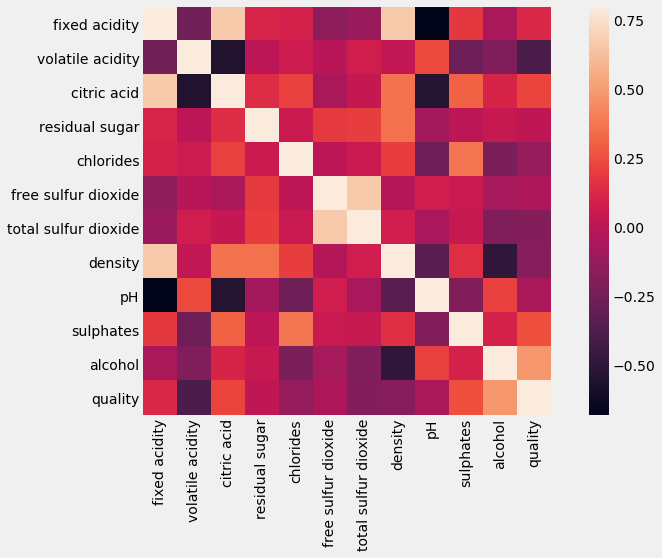

In [72]:
f, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(corr, vmax = 0.8, square = True)

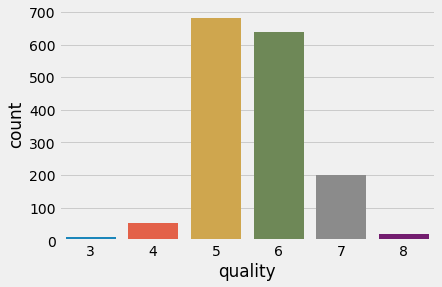

In [73]:
sns.countplot(data.quality)

In [74]:



X = data.drop(['quality','pH', 'chlorides', 'density', 'total sulfur dioxide', 'volatile acidity'], axis = 1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train.shape)

(1199, 6)


In [75]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [76]:
# from sklearn.decomposition import PCA 
# pca = PCA()
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)

In [77]:
print(X_train.shape)

(1199, 6)


In [78]:
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

In [79]:
from sklearn import tree

clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
confidence = clf.score(X_test, y_test)
print("\nThe confidence score:\n")
print(confidence)


The confidence score:

0.5675


In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
confidence = rfc.score(X_test, y_test)
# predictions
rfc_predict = rfc.predict(X_test)
print(confidence)

0.6725
